11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(28, 28) 10


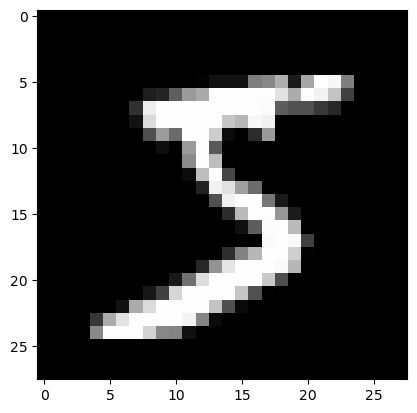

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #acá estamos cargando la información

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

IMG_SHAPE = X_train[0].shape
TARGET_CNT= len(Y_train[0])

print(IMG_SHAPE, TARGET_CNT)
plt.imshow(X_train[0, :,:], cmap='gray')

# normalización para tener datos entre 0 y 1
X_train = X_train / 255
X_test  = X_test  / 255

In [2]:
model = Sequential() #digo de qué forma voy a especificar las capas y neuronas

model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

C:\Users\Mateo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,078 (176.09 KB)

 Trainable params: 45,078 (176.09 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
#!pip install livelossplot --quiet

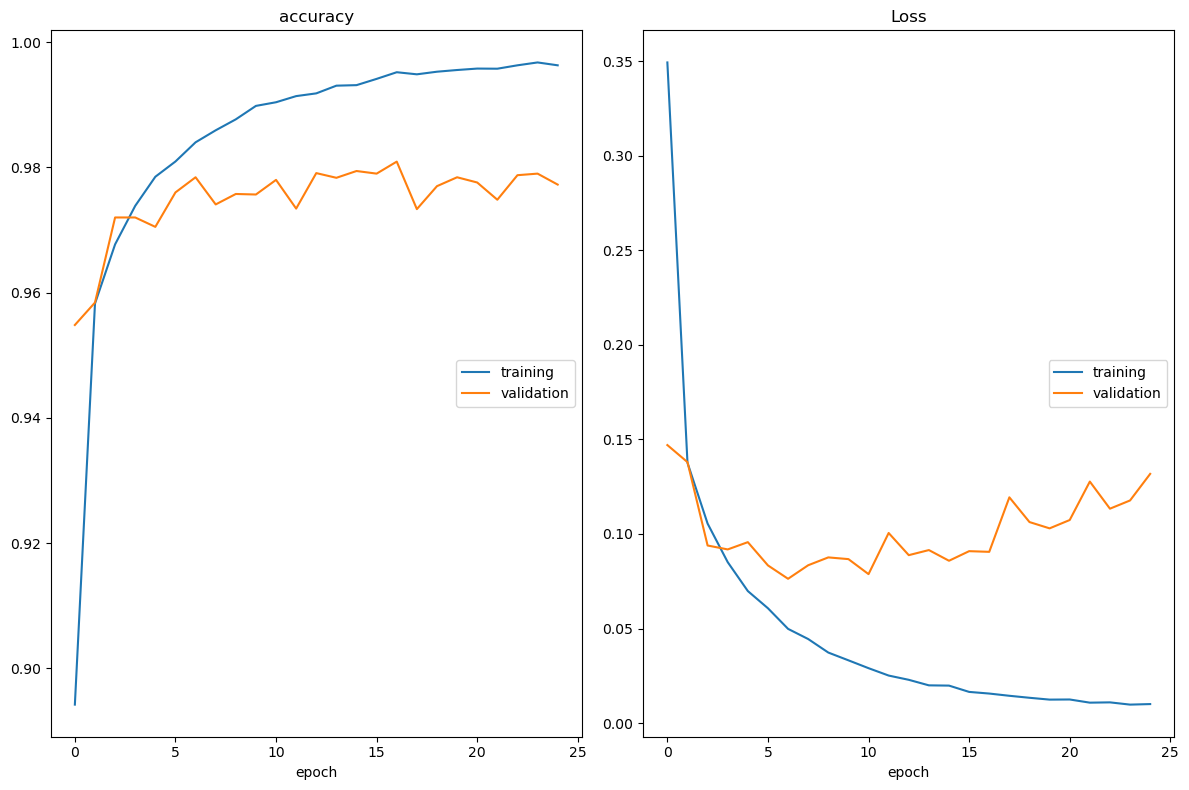

accuracy
	training         	 (min:    0.894, max:    0.997, cur:    0.996)
	validation       	 (min:    0.955, max:    0.981, cur:    0.977)
Loss
	training         	 (min:    0.010, max:    0.349, cur:    0.010)
	validation       	 (min:    0.076, max:    0.147, cur:    0.132)
(60000, 28, 28)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Efectividad del modelo con datos de entrenamiento:  99.12%
Efectividad del modelo con datos de Prueba.......:  97.52%


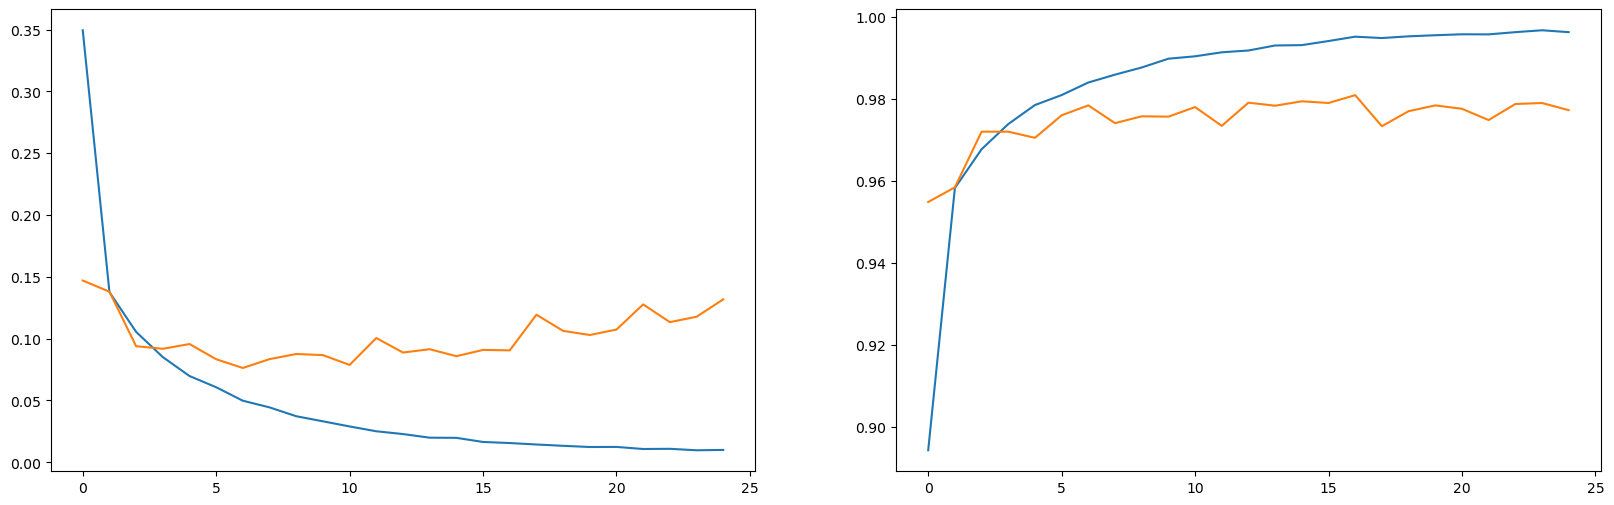

<Figure size 640x480 with 0 Axes>

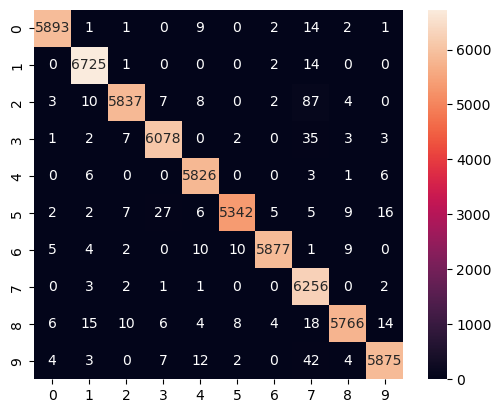

In [4]:
LOTES  = 32
EPOCAS = 25

from livelossplot import PlotLossesKeras

H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=0)


# hago gráfico
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')


# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

In [5]:
# salvamos el modelo para desp recuperarlo:
model.save('Ejercicio1_model.h5')